# Basic Information
* title: "Deduplication of contact information"
* author: "Kent Shih"
* date: "10 10, 2019"

# Data exploration
* Some missing value 
* ??_equality is same as ??, so we remove those columns
* the number of postive data and negatvie data are both balance
* the values of columns have been standarization ? 
* the number of data is sufficent to build a hight complexity model such as deep learning


In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [123]:
data_df = pd.read_csv("./address_matching_data.csv")
data_df[-10:]

,id,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,...,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram,phone_equality,fax_equality,street_number_equality,is_match
28225,2157#2168,0.857143,0.857143,0.565217,0.636364,?,?,?,?,?,...,?,?,?,?,1.0,1.0,m,m,s,1
28226,2875#2882,0.400000,0.400000,0.133333,0.238095,?,?,?,?,?,...,1.0,1.0,?,?,1.0,1.0,s,m,s,1
28227,2640#2644,0.285714,0.285714,0.096774,0.129032,?,?,?,?,?,...,?,?,?,?,1.0,1.0,m,m,s,1
28228,1400#1396,0.666667,0.666667,0.454545,0.478261,?,?,?,?,?,...,?,?,?,?,?,?,m,m,n,1
28229,2018#2024,0.888889,0.888889,0.806452,0.806452,?,?,?,?,?,...,?,?,?,?,1.0,1.0,m,m,s,1
28230,7148#7149,1.000000,1.000000,1.000000,1.000000,1,1,1,1,?,...,1.0,1.0,?,?,1.0,1.0,s,m,s,1
28231,8851#8860,0.727273,0.727273,0.620690,0.628571,?,?,?,?,?,...,?,?,?,?,?,?,m,m,n,1
28232,6468#6470,0.263889,0.066667,0.384615,0.040000,1,1,1,1,0,...,1.0,1.0,?,?,1.0,1.0,s,m,s,-1
28233,3516#3527,0.208571,0.040000,0.187500,0.041667,1,1,1,1,1,...,?,?,?,?,0.666666666667,0.333333343267,m,m,n,-1
28234,12899#12477,0.527778,0.347826,0.380952,0.194444,?,?,?,?,?,...,?,?,?,?,?,?,m,m,n,-1


In [3]:
test_df = pd.read_csv("./address_matching_test.csv")
test_df.head()

,id,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,...,website_trigram_term,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram,phone_equality,fax_equality,street_number_equality
0,7221#7218,0.703704,0.666667,0.680000,0.533333,1,1,1,1,1,...,?,1.0,1.0,?,?,1.0,1.0,s,m,s
1,2393#2398,1.000000,1.000000,0.520000,1.000000,0.666667,0.666667,0.454545,0.5,1,...,?,?,?,?,?,1.0,1.0,m,m,s
2,2509#2510,1.000000,1.000000,1.000000,1.000000,?,?,?,?,?,...,?,1.0,1.0,?,?,?,?,s,m,n
3,3695#3700,0.111310,0.000000,0.095238,0.000000,1,1,1,1,0.8,...,?,?,?,?,?,?,?,m,m,n
4,15918#15955,0.175000,0.074074,0.153846,0.095238,1,1,1,1,1,...,?,?,?,?,?,?,?,m,m,n


In [4]:
# 超過一半是 Match 的
data_df.describe()

,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,is_match
count,28235.000000,28235.000000,28235.000000,28235.000000,28235.00000
mean,0.628171,0.563277,0.537006,0.509530,0.43524
std,0.304767,0.369004,0.324820,0.372265,0.90033
min,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,0.363387,0.222222,0.243243,0.142857,-1.00000
50%,0.666667,0.666667,0.476190,0.483871,1.00000
75%,1.000000,1.000000,0.875000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
# miss value rate
for c in data_df.columns:
    print(c,str(sum(data_df[c]=='?')/28235)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.64
city_trigram_simple 0.64
city_levenshtein_term 0.64
city_trigram_term 0.64
zip_levenshtein_simple 0.72
zip_trigram_simple 0.72
zip_levenshtein_term 0.72
zip_trigram_term 0.72
street_levenshtein_simple 0.70
street_trigram_simple 0.70
street_levenshtein_term 0.70
street_trigram_term 0.70
website_levenshtein_simple 0.93
website_trigram_simple 0.93
website_levenshtein_term 0.93


/net/account/pixuser/kent/python36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


website_trigram_term 0.93
phone_levenshtein 0.57
phone_trigram 0.57
fax_levenshtein 0.97
fax_trigram 0.97
street_number_levenshtein 0.34
street_number_trigram 0.34
phone_equality 0.0
fax_equality 0.0
street_number_equality 0.0
is_match 0.0


In [6]:
for c in data_df.columns:
    if 'equality' in c : 
        print("del",c)
        del data_df[c]

del phone_equality
del fax_equality
del street_number_equality


In [7]:
new_data_df = data_df.replace("?",-1)

for c in new_data_df.columns:
    print(c,str(sum(new_data_df[c]=='?')/28235)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.0
city_trigram_simple 0.0
city_levenshtein_term 0.0
city_trigram_term 0.0
zip_levenshtein_simple 0.0
zip_trigram_simple 0.0
zip_levenshtein_term 0.0
zip_trigram_term 0.0
street_levenshtein_simple 0.0
street_trigram_simple 0.0
street_levenshtein_term 0.0
street_trigram_term 0.0
website_levenshtein_simple 0.0
website_trigram_simple 0.0
website_levenshtein_term 0.0
website_trigram_term 0.0
phone_levenshtein 0.0
phone_trigram 0.0
fax_levenshtein 0.0
fax_trigram 0.0
street_number_levenshtein 0.0
street_number_trigram 0.0
is_match 0.0


# Modeling approach
* becasue we have a lot of labeled data so we could try to use a heavy model , such as deep learning
* but overfitting issue , we just 3 layer and add dropout layer
* the performnace is prety good

In [50]:

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adam
# from keras.metrics import categorical_crossentropy
from keras.losses import categorical_crossentropy

In [ ]:
id_list = new_data_df['id'].tolist()
del new_data_df['id']
match_list = new_data_df['is_match'].tolist()
del new_data_df['is_match']


In [99]:
new_match_list = []
for v in  match_list:
    if v == 1 : new_match_list.append(1)
    else: new_match_list.append(0)

In [51]:
raw_data = new_data_df.to_numpy()

In [52]:
raw_data.shape

(28235, 26)

In [65]:
simple_model = Sequential([
    Dense(raw_data.shape[1], input_shape=(raw_data.shape[1], )),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dropout(0.25),
    Dense(2, activation='softmax')
])

In [228]:
simple_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 26)                702       
_________________________________________________________________
dropout_5 (Dropout)          (None, 26)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                864       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 66        
Total params: 1,632
Trainable params: 1,632
Non-trainable params: 0
_________________________________________________________________


In [103]:
simple_model.compile(Adam(lr=0.001),loss=categorical_crossentropy,metrics=['accuracy'])

In [104]:
y_train=keras.utils.to_categorical(new_match_list[:-1000])


In [105]:
X_train = raw_data[:-1000]

In [106]:
simple_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=8, shuffle=True, verbose=2)

Train on 21788 samples, validate on 5447 samples
Epoch 1/8
 - 2s - loss: 0.2004 - acc: 0.9190 - val_loss: 0.1826 - val_acc: 0.9238
Epoch 2/8
 - 2s - loss: 0.1958 - acc: 0.9227 - val_loss: 0.1842 - val_acc: 0.9234
Epoch 3/8
 - 2s - loss: 0.1938 - acc: 0.9231 - val_loss: 0.1789 - val_acc: 0.9247
Epoch 4/8
 - 2s - loss: 0.1896 - acc: 0.9255 - val_loss: 0.1756 - val_acc: 0.9273
Epoch 5/8
 - 2s - loss: 0.1876 - acc: 0.9249 - val_loss: 0.1741 - val_acc: 0.9288
Epoch 6/8
 - 2s - loss: 0.1863 - acc: 0.9262 - val_loss: 0.1718 - val_acc: 0.9293
Epoch 7/8
 - 2s - loss: 0.1873 - acc: 0.9262 - val_loss: 0.1703 - val_acc: 0.9280
Epoch 8/8
 - 2s - loss: 0.1857 - acc: 0.9273 - val_loss: 0.1661 - val_acc: 0.9310


In [107]:
X_eva = raw_data[-1000:]
y_eva=keras.utils.to_categorical(new_match_list[-1000:])


In [148]:
simple_model.evaluate(    
    x=X_eva,
    y=y_eva,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,)

1000/1000 [==============================] - 0s 32us/step


[0.15026898896694182, 0.935]

In [150]:
from sklearn.metrics import precision_score,f1_score

In [151]:
result_prb = simple_model.predict(X_eva)
predict_classes = simple_model.predict_classes(x=X_eva)

In [155]:
precision_score(new_match_list[-1000:],predict_classes)

0.9424657534246575

In [156]:
f1_score(new_match_list[-1000:],predict_classes)

0.9548924358084664

In [219]:
def TPR(x,y):
    total = sum([v==1 for v in y ])
    tp_count = 0
    for i,v in enumerate(y) :
        if v == 1 and x[i] == 1:
            tp_count = tp_count + 1
    return tp_count/total

In [220]:
def TNR(x,y):
    total = sum([v==0 for v in y ])
    tp_count = 0
    for i,v in enumerate(y) :
        if v == 0 and x[i] == 0:
            tp_count = tp_count + 1
    return tp_count/total

In [221]:
def PRE(x,y):
    total = len(x)
    tp_count = 0
    for i,v in enumerate(y) :
        if v == x[i]:
            tp_count = tp_count + 1
    return tp_count/total

In [222]:
print("PRE",PRE(new_match_list[-1000:],predict_classes))
print("TPR",TPR(new_match_list[-1000:],predict_classes))
print("TNR",TNR(new_match_list[-1000:],predict_classes))

PRE 0.935
TPR 0.9424657534246575
TNR 0.9148148148148149


In [231]:
# Use Grid Search
max_score = -1
score_list = []
for th in np.arange(0.01,1,0.01):
    predict_classes_with_th  = (result_prb[:,1]>th).astype('int')
    print("positive",predict_classes_with_th.sum())
    score = TPR(new_match_list[-1000:],predict_classes_with_th) + TNR(new_match_list[-1000:],predict_classes_with_th)*3

    print("Score:",score, "TPR:",TPR(new_match_list[-1000:],predict_classes_with_th),"TNR:",TNR(new_match_list[-1000:],predict_classes_with_th))
    if score >= max_score : 
        max_score = score
    
    else :
        break
        
    score_list.append(score)


positive 963
Score: 3.7383177570093458 TPR: 0.7383177570093458 TNR: 1.0
positive 934
Score: 3.7612419700214135 TPR: 0.7612419700214133 TNR: 1.0
positive 907
Score: 3.7839029768467474 TPR: 0.7839029768467475 TNR: 1.0
positive 875
Score: 3.7874285714285714 TPR: 0.8114285714285714 TNR: 0.992
positive 848
Score: 3.7338629592850046 TPR: 0.8325471698113207 TNR: 0.9671052631578947


In [235]:
# So the threshold is ? , for PTR + NTR*3
print("for best threshold is " , th - 0.01)

for best threshold is  0.04


In [265]:
## ROC Cuve , I think the normal case , usually is "F1Score"
fpr, tpr, thresholds = roc_curve(new_match_list[-1000:], result_prb[:,1])


In [268]:
# and see roc cuve area 

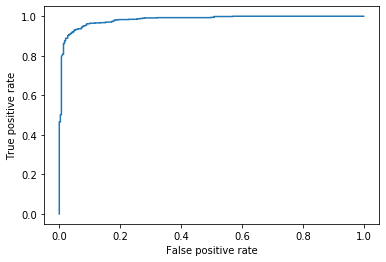

In [267]:

plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


# DO testing

In [109]:
# miss value rate
for c in test_df.columns:
    print(c,str(sum(test_df[c]=='?')/28235)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.14
city_trigram_simple 0.14
city_levenshtein_term 0.14
city_trigram_term 0.14
zip_levenshtein_simple 0.16
zip_trigram_simple 0.16
zip_levenshtein_term 0.16
zip_trigram_term 0.16
street_levenshtein_simple 0.15
street_trigram_simple 0.15
street_levenshtein_term 0.15
street_trigram_term 0.15
website_levenshtein_simple 0.20
website_trigram_simple 0.20
website_levenshtein_term 0.20
website_trigram_term 0.20
phone_levenshtein 0.13
phone_trigram 0.13
fax_levenshtein 0.21
fax_trigram 0.21
street_number_levenshtein 0.07
street_number_trigram 0.07


/net/account/pixuser/kent/python36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [110]:
for c in test_df.columns:
    if 'equality' in c : 
        print("del",c)
        del test_df[c]

In [111]:
new_test_df = test_df.replace("?",-1)

for c in new_test_df.columns:
    print(c,str(sum(new_test_df[c]=='?')/28235)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.0
city_trigram_simple 0.0
city_levenshtein_term 0.0
city_trigram_term 0.0
zip_levenshtein_simple 0.0
zip_trigram_simple 0.0
zip_levenshtein_term 0.0
zip_trigram_term 0.0
street_levenshtein_simple 0.0
street_trigram_simple 0.0
street_levenshtein_term 0.0
street_trigram_term 0.0
website_levenshtein_simple 0.0
website_trigram_simple 0.0
website_levenshtein_term 0.0
website_trigram_term 0.0
phone_levenshtein 0.0
phone_trigram 0.0
fax_levenshtein 0.0
fax_trigram 0.0
street_number_levenshtein 0.0
street_number_trigram 0.0


In [112]:
id_test_list = new_test_df['id'].tolist()
del new_test_df['id']

In [113]:
raw_test_data = new_test_df.to_numpy()

X_test = raw_test_data

In [114]:
test_result = simple_model.predict(X_test)

In [119]:
test_result

array([[1.2837675e-03, 9.9871624e-01],
       [1.9912806e-04, 9.9980086e-01],
       [4.5738770e-03, 9.9542612e-01],
       ...,
       [8.3446211e-01, 1.6553788e-01],
       [9.9118846e-04, 9.9900877e-01],
       [2.5170615e-01, 7.4829388e-01]], dtype=float32)

In [115]:
resut_df =  pd.DataFrame(test_result)

In [116]:
resut_df.describe()

,0,1
count,6.230000e+03,6230.000000
mean,2.973536e-01,0.702646
std,4.039197e-01,0.403920
min,1.304139e-07,0.002266
25%,7.702495e-04,0.247724
50%,1.743495e-02,0.982565
75%,7.522765e-01,0.999230
max,9.977340e-01,1.000000


In [282]:
# testing data , predict result is as below
answer = list( zip(id_test_list,(test_result[:,1]>0.04).astype(int).tolist()))

# Potential improvements
* ensemble methodology
* becasue fale positive rate is also import to operater. so in real case and production env , we need to build a doubel check mechanism
* strong rule, such as decision tree . this algorithm could produce the human readable result and rule that help our user to understnad the system behavior.


# Conclusion 
* this is a very good challenge to test a data scientist.
* i just build only one model , but i think is so far so good as baseline model.
